<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Coppel_Mentimeter_LDA_(Gensim).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade pip
! pip install gensim
! pip install wordcloud
! pip install stanza
! pip install unidecode
! pip install langid
! pip install googletrans

     |████████████████████████████████| 1.5MB 6.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 282 kB 4.8 MB/s 
     |████████████████████████████████| 241 kB 4.9 MB/s 
     |████████████████████████████████| 1.9 MB 6.4 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941189 sha256=fa7a272332cd6e73e57a666d81382154a5fae30b5c46e20e93fccae121e3456b
  Stored in directory: /root/.cache/pip/wheels/b4/77/b4/b38806c8087e0860cfeabab1f96b60c48346d8db59a9254787
Successfully built langid
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 994 kB 7.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 98 kB 5.4 MB/s 
  Created wheel for googletrans: filena

In [2]:
import numpy as np
import pandas as pd
import re

import scipy.stats as st
from collections import Counter
from itertools import chain
import time
import unidecode
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import stanza
stanza.download('es')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2021-02-09 03:23:38 INFO: Downloading default packages for language: es (Spanish)...
2021-02-09 03:24:49 INFO: Finished downloading models and saved to /root/stanza_resources.


# Data

In [3]:
'''
¿Cuál es la Visión de HR Analytics en Coppel?

“Ser un facilitador para la toma de decisiones alineadas a la estrategia de RH”
“Enfoque cuantitativo informado para tomar decisiones correctas en relación a nuestro talento, así como la medición correcta de la efectividad de los servicios de RH para el negocio”
“Generar el conocimiento para la toma de decisiones y la definición de estrategia de Capital Humano necesario para el cumplimiento de los objetivos de negocio”
“Apoyar en la gestión del ciclo de vida del colaborador mediante el uso de datos de forma que podamos enlazar esta gestión con los objetivos del negocio”
“Tener capacidad analítica para atender los retos de negocio referente a Recursos Humanos”
“Tomar decisiones de negocio basadas en el conocimiento generado a partir de la explotación de datos de procesos y capital humano”

¿Cuáles son los objetivos de HR Analytics?

“Proporcionar insumos de información para mejorar la operación del área, alineándola a las necesidades reales del negocio.
Generar una cultura de enfoque cuantitativo para un área tradicionalmente cualitativa.
Probar la efectividad de las iniciativas”
“Ofrecer información y conocimiento amplio y objetivo sobre el capital humano y los procesos de RH a los tomadores de decisiones internos y externos”
“Evaluar el ciclo del colaborador de principio a fin para identificar los puntos de dolor y encontrar soluciones analíticas que permitan reducirlos”
“Habilitar a Desarrollo Organizacional con las herramientas analíticas y de visualización de datos.
Democratizar la información.
Determinar la rentabilidad de los servicios que brindamos y el talento.
Contribuir a la gestión de Talento alineado al negocio”
“Contribuir al cumplimiento de la estrategia de Recursos Humanos mediante el uso de los datos”
'''

'\n¿Cuál es la Visión de HR Analytics en Coppel?\n\n“Ser un facilitador para la toma de decisiones alineadas a la estrategia de RH”\n“Enfoque cuantitativo informado para tomar decisiones correctas en relación a nuestro talento, así como la medición correcta de la efectividad de los servicios de RH para el negocio”\n“Generar el conocimiento para la toma de decisiones y la definición de estrategia de Capital Humano necesario para el cumplimiento de los objetivos de negocio”\n“Apoyar en la gestión del ciclo de vida del colaborador mediante el uso de datos de forma que podamos enlazar esta gestión con los objetivos del negocio”\n“Tener capacidad analítica para atender los retos de negocio referente a Recursos Humanos”\n“Tomar decisiones de negocio basadas en el conocimiento generado a partir de la explotación de datos de procesos y capital humano”\n\n¿Cuáles son los objetivos de HR Analytics?\n\n“Proporcionar insumos de información para mejorar la operación del área, alineándola a las nece

In [4]:
respuestas = ["Ser un facilitador para la toma de decisiones alineadas a la estrategia de RH",
 "Enfoque cuantitativo informado para tomar decisiones correctas en relación a nuestro talento, así como la medición correcta de la efectividad de los servicios de RH para el negocio",
 "Generar el conocimiento para la toma de decisiones y la definición de estrategia de Capital Humano necesario para el cumplimiento de los objetivos de negocio",
 "Apoyar en la gestión del ciclo de vida del colaborador mediante el uso de datos de forma que podamos enlazar esta gestión con los objetivos del negocio",
 "Tener capacidad analítica para atender los retos de negocio referente a Recursos Humanos",
 "Tomar decisiones de negocio basadas en el conocimiento generado a partir de la explotación de datos de procesos y capital humano",
 "Proporcionar insumos de información para mejorar la operación del área, alineándola a las necesidades reales del negocio. Generar una cultura de enfoque cuantitativo para un área tradicionalmente cualitativa. Probar la efectividad de las iniciativas",
 "Ofrecer información y conocimiento amplio y objetivo sobre el capital humano y los procesos de RH a los tomadores de decisiones internos y externos",
 "Evaluar el ciclo del colaborador de principio a fin para identificar los puntos de dolor y encontrar soluciones analíticas que permitan reducirlos",
 "Habilitar a Desarrollo Organizacional con las herramientas analíticas y de visualización de datos. Democratizar la información. Determinar la rentabilidad de los servicios que brindamos y el talento. Contribuir a la gestión de Talento alineado al negocio",
 "Contribuir al cumplimiento de la estrategia de Recursos Humanos mediante el uso de los datos"]

In [5]:
len(respuestas)

11

In [6]:
df = pd.DataFrame(respuestas, columns=["respuestas"])
df

,respuestas
0,Ser un facilitador para la toma de decisiones ...
1,Enfoque cuantitativo informado para tomar deci...
2,Generar el conocimiento para la toma de decisi...
3,Apoyar en la gestión del ciclo de vida del col...
4,Tener capacidad analítica para atender los ret...
5,Tomar decisiones de negocio basadas en el cono...
6,Proporcionar insumos de información para mejor...
7,Ofrecer información y conocimiento amplio y ob...
8,Evaluar el ciclo del colaborador de principio ...
9,Habilitar a Desarrollo Organizacional con las ...


# NLP pipeline

In [7]:
SPECIALWORDS = []
STOPWORDS = stopwords.words('spanish')
# Quitar las tildes de las STOPWORDS:
STOPWORDS = [unidecode.unidecode(stop) for stop in STOPWORDS]
STOPWORDS = list(set(STOPWORDS))
STOPWORDS.sort()

In [8]:
nlp = stanza.Pipeline('es')

2021-02-09 03:26:53 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2021-02-09 03:26:53 INFO: Use device: cpu
2021-02-09 03:26:53 INFO: Loading: tokenize
2021-02-09 03:26:53 INFO: Loading: mwt
2021-02-09 03:26:53 INFO: Loading: pos
2021-02-09 03:26:53 INFO: Loading: lemma
2021-02-09 03:26:53 INFO: Loading: depparse
2021-02-09 03:26:54 INFO: Loading: ner
2021-02-09 03:26:55 INFO: Done loading processors!


In [9]:
def preprocess_text(text, lemmatize = False):
    """Convierte un texto en una lista de los lemas de las palabras, eliminando las stop words"""
    text = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑ]", " ", text)
    text = text.lower()
    if len(text.split()) > 0:
        if lemmatize: 
            doc = nlp(text)
            doc = doc.sentences[0].to_dict()
            words = [unidecode.unidecode(doc[i].get('lemma', doc[i]['text']))\
                     if unidecode.unidecode(doc[i]['text']) not in SPECIALWORDS \
                     else unidecode.unidecode(doc[i]['text'])\
                     for i in range(len(doc))]
        else:
            words = word_tokenize(text)
        words = list(filter(lambda x: (len(x)>3) or (x in SPECIALWORDS), words))
        words = list(filter(lambda x: x not in STOPWORDS, words))
    else:
        words = ['']
    return words

In [10]:
processed_docs = [preprocess_text(t, lemmatize=True) for t in df['respuestas']]

In [11]:
processed_docs

[['facilitador', 'toma', 'decision', 'alineado', 'estrategia'],
 ['enfoque',
  'cuantitativo',
  'informado',
  'tomar',
  'decision',
  'correcto',
  'relacion',
  'talento',
  'medicion',
  'correcto',
  'efectividad',
  'servicio',
  'negocio'],
 ['generar',
  'conocimiento',
  'toma',
  'decision',
  'definicion',
  'estrategia',
  'capital',
  'humano',
  'necesario',
  'cumplimiento',
  'objetivo',
  'negocio'],
 ['apoyar',
  'gestion',
  'ciclo',
  'vida',
  'colaborador',
  'mediante',
  'dato',
  'forma',
  'poder',
  'enlazar',
  'gestion',
  'objetivo',
  'negocio'],
 ['tener',
  'capacidad',
  'analitico',
  'atender',
  'reto',
  'negocio',
  'referente',
  'recurso',
  'humano'],
 ['tomar',
  'decision',
  'negocio',
  'basado',
  'conocimiento',
  'generado',
  'partir',
  'explotacion',
  'dato',
  'proceso',
  'capital',
  'humano'],
 ['proporcionar',
  'insumo',
  'informacion',
  'mejorar',
  'operacion',
  'area',
  'alineandola',
  'alinear',
  'necesidad',
  'real

In [12]:
processed_docs = [x if type(x)==list else [] for x in processed_docs]

In [13]:
processed_docs

[['facilitador', 'toma', 'decision', 'alineado', 'estrategia'],
 ['enfoque',
  'cuantitativo',
  'informado',
  'tomar',
  'decision',
  'correcto',
  'relacion',
  'talento',
  'medicion',
  'correcto',
  'efectividad',
  'servicio',
  'negocio'],
 ['generar',
  'conocimiento',
  'toma',
  'decision',
  'definicion',
  'estrategia',
  'capital',
  'humano',
  'necesario',
  'cumplimiento',
  'objetivo',
  'negocio'],
 ['apoyar',
  'gestion',
  'ciclo',
  'vida',
  'colaborador',
  'mediante',
  'dato',
  'forma',
  'poder',
  'enlazar',
  'gestion',
  'objetivo',
  'negocio'],
 ['tener',
  'capacidad',
  'analitico',
  'atender',
  'reto',
  'negocio',
  'referente',
  'recurso',
  'humano'],
 ['tomar',
  'decision',
  'negocio',
  'basado',
  'conocimiento',
  'generado',
  'partir',
  'explotacion',
  'dato',
  'proceso',
  'capital',
  'humano'],
 ['proporcionar',
  'insumo',
  'informacion',
  'mejorar',
  'operacion',
  'area',
  'alineandola',
  'alinear',
  'necesidad',
  'real

In [14]:
len(processed_docs)

11

In [15]:
for e in processed_docs:
    print(len(e))

5
13
12
13
9
12
21
12
13
19
7


In [16]:
df['palabras'] = [' '.join(doc) for doc in processed_docs]

In [17]:
df

,respuestas,palabras
0,Ser un facilitador para la toma de decisiones ...,facilitador toma decision alineado estrategia
1,Enfoque cuantitativo informado para tomar deci...,enfoque cuantitativo informado tomar decision ...
2,Generar el conocimiento para la toma de decisi...,generar conocimiento toma decision definicion ...
3,Apoyar en la gestión del ciclo de vida del col...,apoyar gestion ciclo vida colaborador mediante...
4,Tener capacidad analítica para atender los ret...,tener capacidad analitico atender reto negocio...
5,Tomar decisiones de negocio basadas en el cono...,tomar decision negocio basado conocimiento gen...
6,Proporcionar insumos de información para mejor...,proporcionar insumo informacion mejorar operac...
7,Ofrecer información y conocimiento amplio y ob...,ofrecer informacion conocimiento amplio objeti...
8,Evaluar el ciclo del colaborador de principio ...,evaluar ciclo colaborador principio identifica...
9,Habilitar a Desarrollo Organizacional con las ...,habilitar desarrollo organizacional herramient...


In [18]:
df['palabras_unicas'] = [' '.join(set(doc)) for doc in processed_docs]

In [19]:
df

,respuestas,palabras,palabras_unicas
0,Ser un facilitador para la toma de decisiones ...,facilitador toma decision alineado estrategia,alineado estrategia facilitador toma decision
1,Enfoque cuantitativo informado para tomar deci...,enfoque cuantitativo informado tomar decision ...,enfoque relacion cuantitativo talento correcto...
2,Generar el conocimiento para la toma de decisi...,generar conocimiento toma decision definicion ...,necesario definicion estrategia generar humano...
3,Apoyar en la gestión del ciclo de vida del col...,apoyar gestion ciclo vida colaborador mediante...,gestion colaborador vida apoyar poder negocio ...
4,Tener capacidad analítica para atender los ret...,tener capacidad analitico atender reto negocio...,reto humano analitico atender tener capacidad ...
5,Tomar decisiones de negocio basadas en el cono...,tomar decision negocio basado conocimiento gen...,partir basado generado dato humano proceso tom...
6,Proporcionar insumos de información para mejor...,proporcionar insumo informacion mejorar operac...,necesidad cultura enfoque alinear tradicionalm...
7,Ofrecer información y conocimiento amplio y ob...,ofrecer informacion conocimiento amplio objeti...,tomador humano proceso externo informacion con...
8,Evaluar el ciclo del colaborador de principio ...,evaluar ciclo colaborador principio identifica...,solucion identificar punto colaborador evaluar...
9,Habilitar a Desarrollo Organizacional con las ...,habilitar desarrollo organizacional herramient...,alineado gestion talento determinar visualizac...


# Topic Discovery (LDA)

In [21]:
def compute_coherence_values(dictionary, corpus, texts, num_topics = range(2,10,2)):
    """
    Compute c_v coherence for various number of topics
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for i in num_topics:
        model = LdaMulticore(bow_corpus, num_topics = i, id2word = dictionary, workers = 2, passes = 50, random_state=2)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [22]:
min_obs = 1
dictionary = Dictionary([doc.split() for doc in df['palabras']])
dictionary.filter_extremes(no_below=min_obs) #filtramos por las palabras que aparecen mínimo una vez

In [24]:
print(list(dictionary))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


In [25]:
processed_docs = [doc.split() for doc in df['palabras']]

In [26]:
processed_docs

[['facilitador', 'toma', 'decision', 'alineado', 'estrategia'],
 ['enfoque',
  'cuantitativo',
  'informado',
  'tomar',
  'decision',
  'correcto',
  'relacion',
  'talento',
  'medicion',
  'correcto',
  'efectividad',
  'servicio',
  'negocio'],
 ['generar',
  'conocimiento',
  'toma',
  'decision',
  'definicion',
  'estrategia',
  'capital',
  'humano',
  'necesario',
  'cumplimiento',
  'objetivo',
  'negocio'],
 ['apoyar',
  'gestion',
  'ciclo',
  'vida',
  'colaborador',
  'mediante',
  'dato',
  'forma',
  'poder',
  'enlazar',
  'gestion',
  'objetivo',
  'negocio'],
 ['tener',
  'capacidad',
  'analitico',
  'atender',
  'reto',
  'negocio',
  'referente',
  'recurso',
  'humano'],
 ['tomar',
  'decision',
  'negocio',
  'basado',
  'conocimiento',
  'generado',
  'partir',
  'explotacion',
  'dato',
  'proceso',
  'capital',
  'humano'],
 ['proporcionar',
  'insumo',
  'informacion',
  'mejorar',
  'operacion',
  'area',
  'alineandola',
  'alinear',
  'necesidad',
  'real

In [27]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [28]:
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(1, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(1, 1),
  (2, 1),
  (4, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(20, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)],
 [(1, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (20, 1),
  (26, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(6, 1),
  (7, 1),
  (8, 1),
  (19, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(1, 1),
  (15, 1),
  (16, 1),
  (20, 1),
  (22, 1),
  (44, 1),
  (50, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(24, 1),
  (25, 1),
  (33, 1),
  (65, 1),
  (66, 1),
  (67, 1),

In [29]:
num_topics = [2,3,4,5]
model_list, coherence_values = compute_coherence_values(dictionary, bow_corpus, texts = processed_docs, num_topics = num_topics)

In [30]:
topic_models_dict = {i: m for i,m in zip(num_topics, model_list)}

In [31]:
topic_models_dict

{2: <gensim.models.ldamulticore.LdaMulticore at 0x7fb5041c5f98>,
 3: <gensim.models.ldamulticore.LdaMulticore at 0x7fb5799db5f8>,
 4: <gensim.models.ldamulticore.LdaMulticore at 0x7fb570e5ed30>,
 5: <gensim.models.ldamulticore.LdaMulticore at 0x7fb5094fba90>}

In [32]:
coherence_values

[0.3357789586071759,
 0.5745834419665417,
 0.4849307943842125,
 0.4729899289334856]

In [33]:
def word_cloud(lda_model):
    for topic in range(lda_model.num_topics):
        plt.figure(figsize=(7, 7))
        plt.imshow(WordCloud(background_color="white", 
                             max_words=20).fit_words(dict(lda_model.show_topic(topic, 200))))
        plt.axis("off")
        plt.title("Topic #" + str(topic))
        plt.show()

2


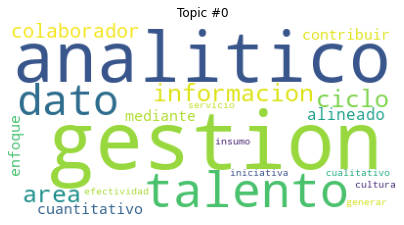

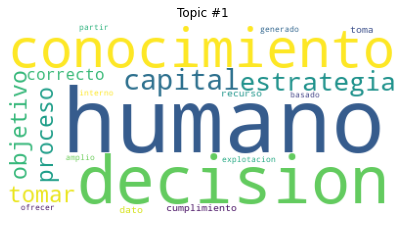



3


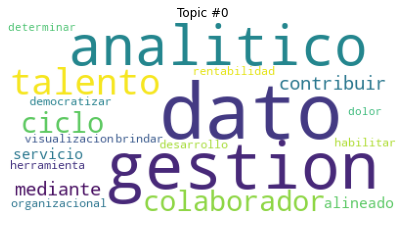

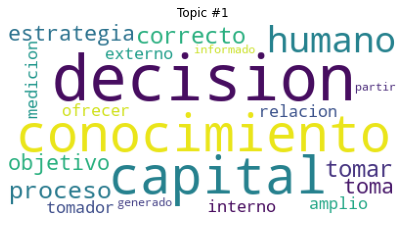

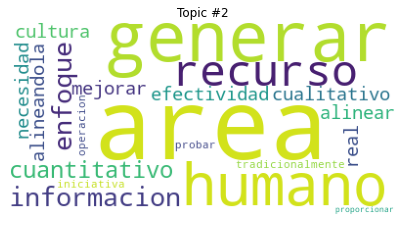



4


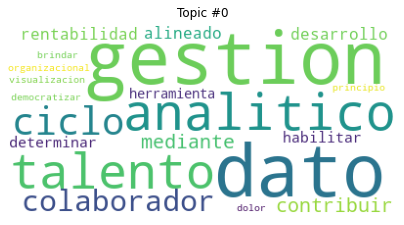

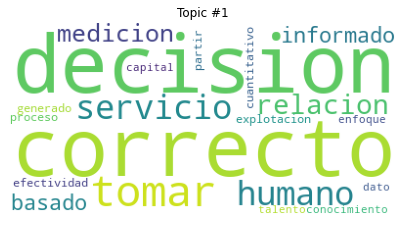

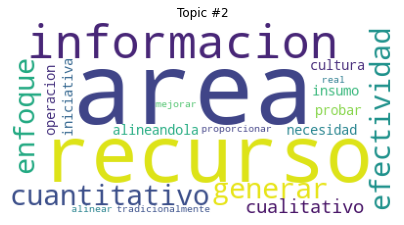

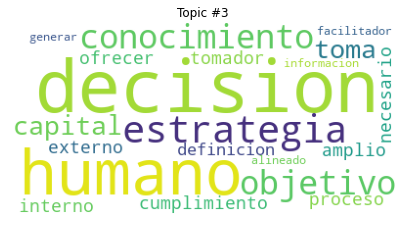



5


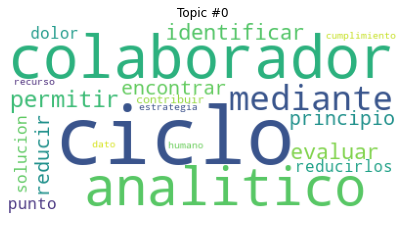

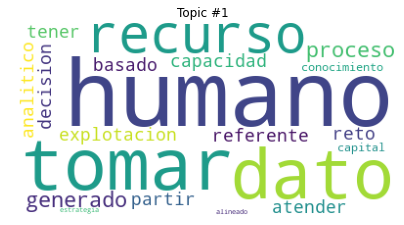

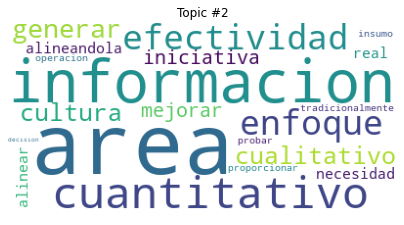

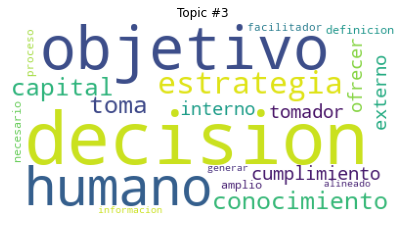

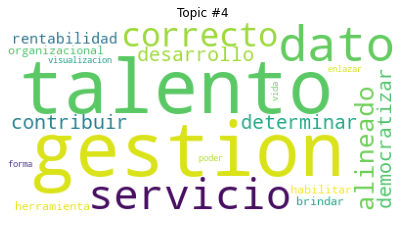

In [34]:
for key,value in topic_models_dict.items():
    print(key)
    word_cloud(value)
    print("\n")

# Clasificación de las respuestas en los Topics:

### Con 2 topics

In [35]:
topic_models_dict[2].print_topics(num_words=5)

[(0,
  '0.033*"gestion" + 0.024*"analitico" + 0.024*"talento" + 0.024*"dato" + 0.024*"informacion"'),
 (1,
  '0.051*"humano" + 0.051*"decision" + 0.032*"conocimiento" + 0.032*"capital" + 0.032*"estrategia"')]

In [36]:
topics = []
topics_prob = []
for e in bow_corpus:
    top_topics = topic_models_dict[2].get_document_topics(e, minimum_probability=0.0)
    top_topics.sort(key = lambda x: x[1])
    topics.append(top_topics[-1][0])
    topics_prob.append(top_topics[-1][1])

In [37]:
df_2topics = df.copy()
df_2topics['topics'] = topics
df_2topics['topics_prob'] = topics_prob

In [38]:
df_2topics

,respuestas,palabras,palabras_unicas,topics,topics_prob
0,Ser un facilitador para la toma de decisiones ...,facilitador toma decision alineado estrategia,alineado estrategia facilitador toma decision,1,0.908907
1,Enfoque cuantitativo informado para tomar deci...,enfoque cuantitativo informado tomar decision ...,enfoque relacion cuantitativo talento correcto...,1,0.950685
2,Generar el conocimiento para la toma de decisi...,generar conocimiento toma decision definicion ...,necesario definicion estrategia generar humano...,1,0.955657
3,Apoyar en la gestión del ciclo de vida del col...,apoyar gestion ciclo vida colaborador mediante...,gestion colaborador vida apoyar poder negocio ...,0,0.955628
4,Tener capacidad analítica para atender los ret...,tener capacidad analitico atender reto negocio...,reto humano analitico atender tener capacidad ...,1,0.937001
5,Tomar decisiones de negocio basadas en el cono...,tomar decision negocio basado conocimiento gen...,partir basado generado dato humano proceso tom...,1,0.956039
6,Proporcionar insumos de información para mejor...,proporcionar insumo informacion mejorar operac...,necesidad cultura enfoque alinear tradicionalm...,0,0.973534
7,Ofrecer información y conocimiento amplio y ob...,ofrecer informacion conocimiento amplio objeti...,tomador humano proceso externo informacion con...,1,0.957634
8,Evaluar el ciclo del colaborador de principio ...,evaluar ciclo colaborador principio identifica...,solucion identificar punto colaborador evaluar...,0,0.962605
9,Habilitar a Desarrollo Organizacional con las ...,habilitar desarrollo organizacional herramient...,alineado gestion talento determinar visualizac...,0,0.969726


### Con 3 topics

In [ ]:
topic_models_dict[3].print_topics(num_words=5)

[(0,
  '0.043*"dato" + 0.043*"gestion" + 0.030*"analitico" + 0.030*"talento" + 0.030*"colaborador"'),
 (1,
  '0.070*"decision" + 0.044*"conocimiento" + 0.044*"capital" + 0.041*"humano" + 0.031*"proceso"'),
 (2,
  '0.039*"area" + 0.038*"generar" + 0.026*"humano" + 0.022*"recurso" + 0.022*"informacion"')]

In [39]:
topics = []
topics_prob = []
for e in bow_corpus:
    top_topics = topic_models_dict[3].get_document_topics(e, minimum_probability=0.0)
    top_topics.sort(key = lambda x: x[1])
    topics.append(top_topics[-1][0])
    topics_prob.append(top_topics[-1][1])

In [40]:
topics

[1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0]

In [41]:
topics_prob

[0.88581616,
 0.946173,
 0.6759315,
 0.9476553,
 0.9219772,
 0.9426229,
 0.96766937,
 0.94739306,
 0.9518982,
 0.96380615,
 0.90338975]

In [42]:
df_3topics = df.copy()
df_3topics['topics'] = topics
df_3topics['topics_prob'] = topics_prob

In [43]:
df_3topics

,respuestas,palabras,palabras_unicas,topics,topics_prob
0,Ser un facilitador para la toma de decisiones ...,facilitador toma decision alineado estrategia,alineado estrategia facilitador toma decision,1,0.885816
1,Enfoque cuantitativo informado para tomar deci...,enfoque cuantitativo informado tomar decision ...,enfoque relacion cuantitativo talento correcto...,1,0.946173
2,Generar el conocimiento para la toma de decisi...,generar conocimiento toma decision definicion ...,necesario definicion estrategia generar humano...,1,0.675932
3,Apoyar en la gestión del ciclo de vida del col...,apoyar gestion ciclo vida colaborador mediante...,gestion colaborador vida apoyar poder negocio ...,0,0.947655
4,Tener capacidad analítica para atender los ret...,tener capacidad analitico atender reto negocio...,reto humano analitico atender tener capacidad ...,2,0.921977
5,Tomar decisiones de negocio basadas en el cono...,tomar decision negocio basado conocimiento gen...,partir basado generado dato humano proceso tom...,1,0.942623
6,Proporcionar insumos de información para mejor...,proporcionar insumo informacion mejorar operac...,necesidad cultura enfoque alinear tradicionalm...,2,0.967669
7,Ofrecer información y conocimiento amplio y ob...,ofrecer informacion conocimiento amplio objeti...,tomador humano proceso externo informacion con...,1,0.947393
8,Evaluar el ciclo del colaborador de principio ...,evaluar ciclo colaborador principio identifica...,solucion identificar punto colaborador evaluar...,0,0.951898
9,Habilitar a Desarrollo Organizacional con las ...,habilitar desarrollo organizacional herramient...,alineado gestion talento determinar visualizac...,0,0.963806


In [44]:
df_3topics['topics'].unique()

array([1, 0, 2])

### Con 4 topics

In [45]:
topic_models_dict[4].print_topics(num_words=5)

[(0,
  '0.046*"dato" + 0.046*"gestion" + 0.032*"analitico" + 0.032*"talento" + 0.032*"ciclo"'),
 (1,
  '0.051*"decision" + 0.051*"correcto" + 0.051*"tomar" + 0.028*"humano" + 0.028*"servicio"'),
 (2,
  '0.046*"area" + 0.025*"recurso" + 0.025*"informacion" + 0.025*"generar" + 0.025*"cuantitativo"'),
 (3,
  '0.066*"decision" + 0.046*"humano" + 0.046*"estrategia" + 0.046*"objetivo" + 0.046*"conocimiento"')]

In [46]:
topics = []
topics_prob = []
for e in bow_corpus:
    top_topics = topic_models_dict[4].get_document_topics(e, minimum_probability=0.0)
    top_topics.sort(key = lambda x: x[1])
    topics.append(top_topics[-1][0])
    topics_prob.append(top_topics[-1][1])

In [47]:
df_4topics = df.copy()
df_4topics['topics'] = topics
df_4topics['topics_prob'] = topics_prob

In [48]:
df_4topics

,respuestas,palabras,palabras_unicas,topics,topics_prob
0,Ser un facilitador para la toma de decisiones ...,facilitador toma decision alineado estrategia,alineado estrategia facilitador toma decision,3,0.874001
1,Enfoque cuantitativo informado para tomar deci...,enfoque cuantitativo informado tomar decision ...,enfoque relacion cuantitativo talento correcto...,1,0.941660
2,Generar el conocimiento para la toma de decisi...,generar conocimiento toma decision definicion ...,necesario definicion estrategia generar humano...,3,0.936845
3,Apoyar en la gestión del ciclo de vida del col...,apoyar gestion ciclo vida colaborador mediante...,gestion colaborador vida apoyar poder negocio ...,0,0.941864
4,Tener capacidad analítica para atender los ret...,tener capacidad analitico atender reto negocio...,reto humano analitico atender tener capacidad ...,2,0.915152
5,Tomar decisiones de negocio basadas en el cono...,tomar decision negocio basado conocimiento gen...,partir basado generado dato humano proceso tom...,1,0.935822
6,Proporcionar insumos de información para mejor...,proporcionar insumo informacion mejorar operac...,necesidad cultura enfoque alinear tradicionalm...,2,0.964034
7,Ofrecer información y conocimiento amplio y ob...,ofrecer informacion conocimiento amplio objeti...,tomador humano proceso externo informacion con...,3,0.941652
8,Evaluar el ciclo del colaborador de principio ...,evaluar ciclo colaborador principio identifica...,solucion identificar punto colaborador evaluar...,0,0.946297
9,Habilitar a Desarrollo Organizacional con las ...,habilitar desarrollo organizacional herramient...,alineado gestion talento determinar visualizac...,0,0.960091


### Con 5 topics

In [49]:
topic_models_dict[5].print_topics(num_words=5)

[(0,
  '0.032*"colaborador" + 0.032*"ciclo" + 0.032*"analitico" + 0.032*"mediante" + 0.032*"reducir"'),
 (1,
  '0.061*"humano" + 0.033*"tomar" + 0.033*"dato" + 0.033*"recurso" + 0.033*"proceso"'),
 (2,
  '0.059*"area" + 0.032*"informacion" + 0.032*"cuantitativo" + 0.032*"enfoque" + 0.032*"efectividad"'),
 (3,
  '0.071*"decision" + 0.049*"objetivo" + 0.049*"humano" + 0.049*"estrategia" + 0.049*"capital"'),
 (4,
  '0.054*"talento" + 0.054*"gestion" + 0.037*"dato" + 0.037*"servicio" + 0.037*"correcto"')]

In [50]:
topics = []
topics_prob = []
for e in bow_corpus:
    top_topics = topic_models_dict[5].get_document_topics(e, minimum_probability=0.0)
    top_topics.sort(key = lambda x: x[1])
    topics.append(top_topics[-1][0])
    topics_prob.append(top_topics[-1][1])

In [51]:
df_5topics = df.copy()
df_5topics['topics'] = topics
df_5topics['topics_prob'] = topics_prob

In [52]:
df_5topics

,respuestas,palabras,palabras_unicas,topics,topics_prob
0,Ser un facilitador para la toma de decisiones ...,facilitador toma decision alineado estrategia,alineado estrategia facilitador toma decision,3,0.866315
1,Enfoque cuantitativo informado para tomar deci...,enfoque cuantitativo informado tomar decision ...,enfoque relacion cuantitativo talento correcto...,4,0.937999
2,Generar el conocimiento para la toma de decisi...,generar conocimiento toma decision definicion ...,necesario definicion estrategia generar humano...,3,0.933055
3,Apoyar en la gestión del ciclo de vida del col...,apoyar gestion ciclo vida colaborador mediante...,gestion colaborador vida apoyar poder negocio ...,4,0.938123
4,Tener capacidad analítica para atender los ret...,tener capacidad analitico atender reto negocio...,reto humano analitico atender tener capacidad ...,1,0.910805
5,Tomar decisiones de negocio basadas en el cono...,tomar decision negocio basado conocimiento gen...,partir basado generado dato humano proceso tom...,1,0.932799
6,Proporcionar insumos de información para mejor...,proporcionar insumo informacion mejorar operac...,necesidad cultura enfoque alinear tradicionalm...,2,0.961848
7,Ofrecer información y conocimiento amplio y ob...,ofrecer informacion conocimiento amplio objeti...,tomador humano proceso externo informacion con...,3,0.938209
8,Evaluar el ciclo del colaborador de principio ...,evaluar ciclo colaborador principio identifica...,solucion identificar punto colaborador evaluar...,0,0.942765
9,Habilitar a Desarrollo Organizacional con las ...,habilitar desarrollo organizacional herramient...,alineado gestion talento determinar visualizac...,4,0.957723
